Die meist umkäpften Pixel im Canvas

In [1]:
from src.data.dataset_functions import get_dataframe

dataFrame = get_dataframe(True)
dataFrame.printSchema()

providing ../data/raw/2022_place_canvas_history-000000000050.csv ...
../data/raw/2022_place_canvas_history-000000000050.csv is already in data/raw
:: loading settings :: url = jar:file:/usr/local/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/vscode/.ivy2/cache
The jars for the packages stored in: /home/vscode/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-dcd2c3e2-71ee-4af9-9b0a-2516f9fdd000;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 383ms :: artifacts dl 11ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	--------------------------------

root
 |-- user_id: string (nullable = true)
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- t: long (nullable = true)
 |-- pixel_color: string (nullable = true)



Nun dataFrame nach Pixel gruppieren (Hab dafür eine entsprechende Methode ergänzt)

In [4]:
from src.features.feature_functions import group_dataframe_by_pixel, group_dataframe_by_columns

groupedFrame = group_dataframe_by_pixel(dataFrame)
groupedFrame.printSchema()

root
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- count: long (nullable = false)
 |-- collect_list(user_id): array (nullable = false)
 |    |-- element: string (containsNull = false)
 |-- collect_list(t): array (nullable = false)
 |    |-- element: long (containsNull = false)
 |-- collect_list(pixel_color): array (nullable = false)
 |    |-- element: string (containsNull = false)



In [5]:
groupedFrame.show(2)

+---+---+-----+---------------------+--------------------+-------------------------+
|  x|  y|count|collect_list(user_id)|     collect_list(t)|collect_list(pixel_color)|
+---+---+-----+---------------------+--------------------+-------------------------+
|  0|  0|  784| [U7ZGIDmgxWHUBUud...|[3, 389, 16, 396,...|     [#7EED56, #FFFFFF...|
|359|564|  762| [O1UuQMoNHYhabtSD...|[3178, 3179, 3180...|     [#000000, #000000...|
+---+---+-----+---------------------+--------------------+-------------------------+
only showing top 2 rows



Spalten, die für die Visualisierung störend sind, entfernen.

In [6]:
from src.visualization.visuialization_functions import show_and_save
import matplotlib.pyplot as plt
import numpy as np

droppedFrame = groupedFrame.drop('collect_list(t)').drop('collect_list(user_id)').drop('collect_list(pixel_color)')
droppedFrame.printSchema()

root
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- count: long (nullable = false)



Die Top 10 der am meisten geänderten Pixel.

In [7]:
droppedFrame.show(10)

+----+----+-----+
|   x|   y|count|
+----+----+-----+
|   0|   0|  784|
| 359| 564|  762|
|1999|1999|  620|
| 349| 564|  613|
|   0|1999|  516|
|1890| 353|  470|
|1852| 590|  463|
| 662| 222|  458|
|1058| 756|  457|
|   8|1267|  441|
+----+----+-----+
only showing top 10 rows



Das ganze noch visualisieren.

ValueError: too many values to unpack (expected 2)

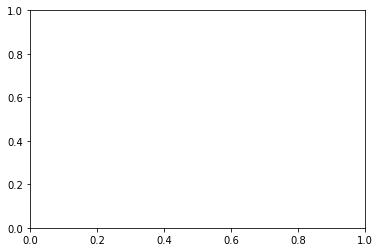

In [8]:
datacollect = droppedFrame.collect()
#wie mache ich weiter???
fig,ax = plt.subplots()
for row in datacollect:
    pixelcount,usercount = list(row)
    ax.bar(pixelcount,usercount,color='#5050cc')
ax.set_xticks(np.arange(1,10,1))
ax.set_title('Die 10 am meisten umkämpften Pixel')
ax.set_ylabel('Anzahl der Änderungen')
ax.set_xlabel('Geänderte Pixel')
fig.tight_layout()
#plt.savefig('../reports/figures/meistumkäpften_pixel.jpg',bbox_inches = 'tight')
plt.show()

<div style="color:lightblue">
(Sebastian): 
Was für Daten willst du anzeigen? Pro Pixel einen Balken der angibt wie oft der Pixel gesetzt wurde. Möglichkeit 1: Balken nebeneinander pro Pixel(x und y) dann ist es ein normaler 2D Bar Plot. Möglichkeit 2: X und Y sind getrennte Achsen im Plot. Dann ist es ein 3D Bar Plot. Google gibt Beispiele für 3D. Für 2D hab ich schon ein Beispiel in 0.1-heuer-nutzerfeatures

```
datacollect = groupedbypixelcountFrame.collect()
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots()
for row in datacollect:
    pixelcount,usercount = list(row)
    ax.bar(pixelcount,usercount,color='#5050cc')
ax.set_xticks(np.arange(1,21,1))
ax.set_title('Nutzerzahl pro Pixelhäufigkeit')
ax.set_ylabel('Nutzer')
ax.set_xlabel('Gesetzte Pixel')
fig.tight_layout()
plt.savefig('../reports/figures/nutzerzahl_pro_pixelhaeufigkeit.jpg',bbox_inches = 'tight')
plt.show()
```

Das Formulier ich schnell um :)
Für 3D kannst du ja selber gucken wie das geht:
https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html

Schön wäre eine Balkenfarbe abhängig von der Änderungszahl:

https://stackoverflow.com/questions/44895117/colormap-for-3d-bar-plot-in-matplotlib-applied-to-every-bar

</div>

In [10]:
datacollect = droppedFrame.head(10)

<div style="color:lightblue">(Sebastian): hm die Balken müssen ein bischen Breiter sein weil die Koordinatenbeschriftung sonst zu eng ist.
Das bekommst du schon hin :)
</div>

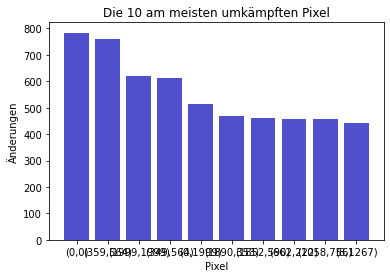

In [38]:

import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots()
i = 1
for row in datacollect:
    x,y,count = list(row)
    pixelcoords = '('+str(x)+','+str(y)+')'
    plt.bar(pixelcoords,count,color='#5050cc')
    i = i+1
plt.title('Die 10 am meisten umkämpften Pixel')
plt.ylabel('Änderungen')
plt.xlabel('Pixel')
plt.savefig('../reports/figures/top10_umkaempfte_pixel.jpg',bbox_inches = 'tight')
plt.show()